<a href="https://colab.research.google.com/github/KMISchool2022/hypTest/blob/main/hypTest.ipynb">
<img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab">
</a>

In [1]:
# Program to find measure of expected significance as a function
# of a cut value x_cut applied to measured variable x.
# G. Cowan / RHUL Physics / December 2022

import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
plt.rcParams["font.size"] = 14

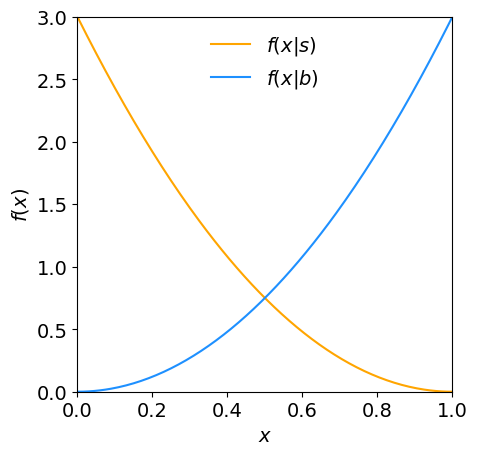

In [2]:
#  Plot the pdfs
def f_s(x):
    return 3.*(1-x)**2
def f_b(x):
    return 3.*x**2
x = np.linspace(0., 1., 201)
fs = f_s(x)
fb = f_b(x)
fig = plt.figure(figsize=(5,5))
plt.plot(x, fs, color='orange', label=r'$f(x|s)$')
plt.plot(x, fb, color='dodgerblue', label=r'$f(x|b)$')
plt.xlabel(r'$x$')
plt.ylabel(r'$f(x)$')
plt.xlim(0., 1.)
plt.ylim(0., 3.)
plt.legend(loc='upper center', frameon=False)
plt.subplots_adjust(left=0.15, right=0.9, top=0.9, bottom=0.15)
plt.show()

In [3]:
# Add code here:

# Find x_cut for size alpha = 0.05


# Find power with respect to s hypothesis for this x_cut


# Calculate s, b, signficance for x_cut=0.1, s_tot=10, b_tot=100


# Find s, b, significance versus x_cut


# Plot s, b versus x_cut


# Plot Z_A versus x_cut


# Find x_cut that maximizes Z_A


# Repeat for case where b is uncertain



In [4]:
from scipy.stats import rv_continuous
class my_dist(rv_continuous):
    "f(x)=f_b(x) distribution"
    def _pdf(self, x):
        return 3.*x**2                # creating the pdf for background
my_Dist_back = my_dist(name='background',a=0,b=1)

In [5]:
class my_dist2(rv_continuous):
    "f(x)=f_b(x) distribution"
    def _pdf(self, x):
        return 3.*(1-x)**2            # creating the pdf for signal
my_Dist_sig = my_dist2(name='signal',a=0,b=1)

In [6]:
# class my_dist2(rv_continuous):
#     "f(x)=f_b(x) distribution"
#     def _pdf(self, x):
#         return (np.sin(np.pi*x))**2            # creating the pdf for signal
# my_Dist = my_dist2(name='signal',a=0,b=1)

Value of $x_{cut}$ such that $P(x < x_{cut}|b)$ is equal to 0.05.

In [7]:
x_cut=my_Dist_back.ppf(0.05)
x_cut

0.36840314986403866

$P(x < x_{cut}|s)$

In [8]:
cdf=my_Dist_sig.cdf(x_cut)
cdf

0.74804680710288

Expected number of background and signal events in $x<x_{cut}$ range.

In [9]:
X_cut = 0.1
b_tot = 100
s_tot = 10

CDF_b = my_Dist_back.cdf(X_cut)
CDF_s = my_Dist_sig.cdf(X_cut)

s = s_tot * CDF_s
b = b_tot * CDF_b

In [10]:
s

2.710000000000001

In [11]:
b

0.10000000000000002

Priors

In [12]:
pi_s = s_tot/(s_tot+b_tot)
pi_b = b_tot/(s_tot+b_tot)

$P(s|x<x_{cut})=\frac{P(x<x_{cut}|s)\pi(s)}{P(x<x_{cut}|s)\pi(s)+P(x<x_{cut}|b)\pi(b)}$

In [13]:
P_s = (CDF_s * pi_s)/(CDF_s * pi_s + CDF_b * pi_b)

In [14]:
P_s

0.9644128113879004

Calculating the p-value

In [15]:
import math
def p_value(b, n_obs):
    term_list=[]
    for n in range(n_obs):
        term = np.exp(-b) * b**n / math.factorial(n)
        term_list.append(term)
    return (1-(np.sum(term_list)))

In [16]:
p_val=p_value(0.5,3)

Calculating the significance $Z=\Phi^{-1}(1-p)$

In [17]:
from statistics import NormalDist

sig = NormalDist(mu=0, sigma=1).inv_cdf(1-p_val)
sig

2.186550477435837

In [18]:
term1 = (s+b)
term2 = np.log(1+(s/b))
Ex_Sig = np.sqrt(2*((term1*term2)-s))
Ex_Sig

3.650619812994654

In [19]:
def ex_sig_gen(x_c):
    b_tot = 100
    s_tot = 10

    CDF_b = my_Dist_back.cdf(x_c)
    CDF_s = my_Dist_sig.cdf(x_c)

    s = s_tot * CDF_s
    b = b_tot * CDF_b

    term1 = (s+b)
    term2 = np.log(1+(s/b))
    return np.sqrt(2*((term1*term2)-s))

In [20]:
from scipy.optimize import minimize_scalar
result = minimize_scalar(
    lambda x: -ex_sig_gen(x),  # Negative for maximization
    bounds=(0,1),  # Search range
    method='bounded'
)
result

 message: Solution found.
 success: True
  status: 0
     fun: -3.683827534866328
       x: 0.12692547022457892
     nit: 12
    nfev: 12